In [2]:
library(dplyr)
library(ggplot2)
library(grid)
library(gridExtra)
library(reshape2)

In [3]:
trainData = tbl_df(read.csv("../data/train.csv", stringsAsFactors = FALSE))
trainData = trainData %>% select(-Id)

In [10]:
get_covariate_hist <- function(df, col_name, type="hist"){
    
    col_df = df %>% select_(col_name) %>% na.omit()
    
    q_tmpl = paste("stats::quantile(", col_name, ",", "probs=")
    
    qs = col_df %>% summarise_(
                        q25=paste(q_tmpl, 0.25, ")"),
                        q75=paste(q_tmpl, 0.75, ")"),
                        q99=paste(q_tmpl, 0.99, ")"),
                        n=~n())
    q25 = qs[['q25']]
    q75 = qs[['q75']]
    q99 = qs[['q99']]
    n = qs[['n']]
    bin_width = 2 * (q75 - q25) * (n ** (- 1/3))
    
    g = ggplot(col_df %>% filter_(paste(col_name, "<", q99)), aes_string(col_name))
    
    if( type == "dens"){
       g = g + geom_density(fill = "red", alpha = "0.7")
    } else {
       g = g + geom_histogram(binwidth=bin_width)
    }
    
    return(g)
}

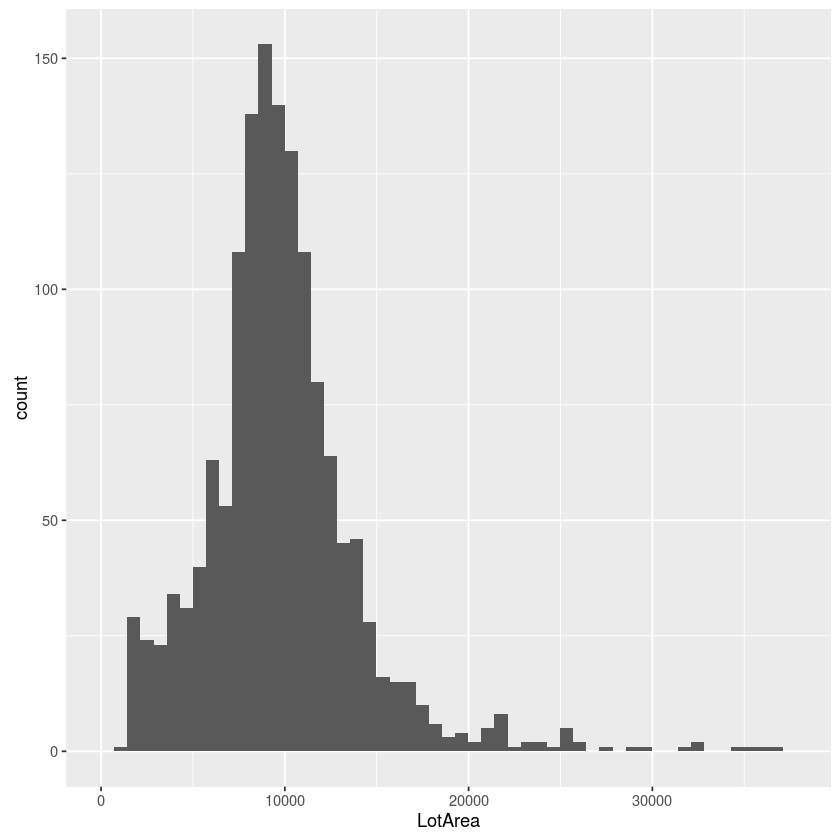

In [13]:
gLotArea = get_covariate_hist(trainData, "LotArea")
gLotArea